In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from frbpoppy import unpickle, merge_pop
from frbpoppy.tns import get_chimefrb_catalog1

import warnings
warnings.filterwarnings('ignore')

## Loading catalog

In [3]:
chime_catalog_1 = get_chimefrb_catalog1(repeater=False)

In [8]:
for model in ['pl', 'sfr', 'delay_0.1gyr', 'delay_0.5gyr', 'delay_1gyr']:
    for i in range(50):
        exec("surv_pop_%s_%s=unpickle('mcmc/surveyed_' + model + '_' + str(i))"%(model.replace('.', ''),i))
for model in ['pl', 'sfr', 'delay_01gyr', 'delay_05gyr', 'delay_1gyr']:
    exec("surv_pop_%s=merge_pop(*[eval('surv_pop_' + model + '_' + str(i)) for i in range(50)])"%model)

In [9]:
pop1 = unpickle('mcmc/pl_zmax1.5')
pop2 = unpickle('mcmc/sfr_zmax1.5')

# Fig.14

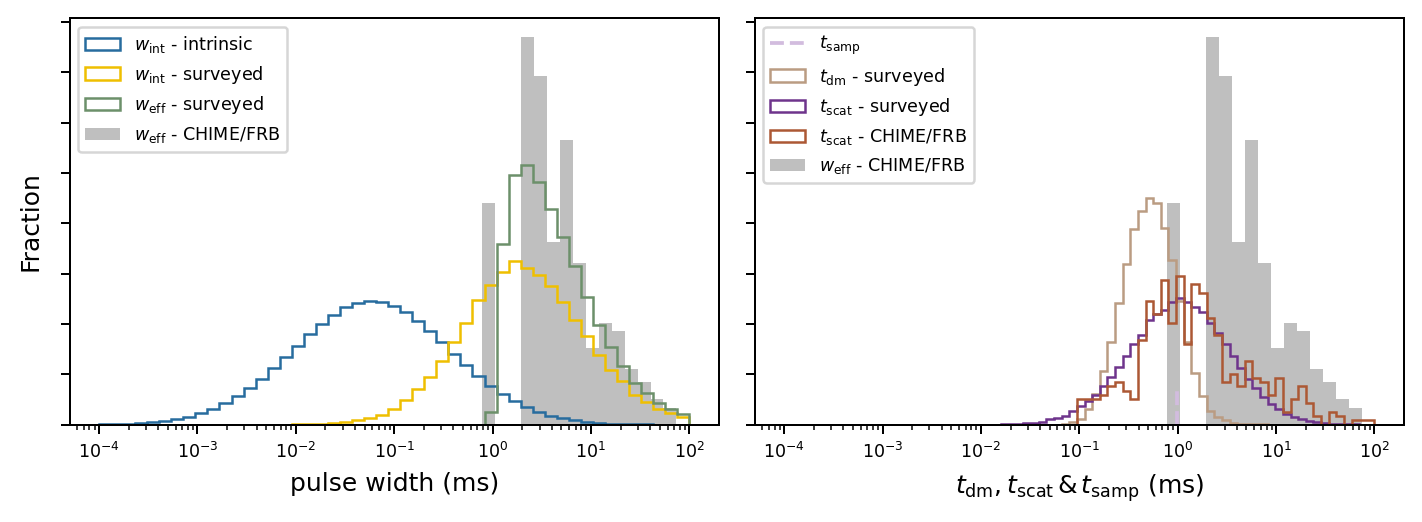

In [19]:
w_bin = np.logspace(-4, 2, 50)
t_scat_bin = np.logspace(-1.8, 2, 50)
w_eff_bin = np.logspace(-0.5, 2, 20)

fig = plt.figure(figsize=(8,3), dpi=180)

ax1 = plt.subplot2grid((1,2),(0,0), rowspan=1)
ax1.hist(pop2.frbs.w_int, histtype='step', bins=w_bin, alpha=1, color='#276C9E', \
         label='$w_\mathrm{int}$ - intrinsic')#1D6887
ax1.hist(np.repeat(surv_pop_delay_01gyr.frbs.w_int, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_int))), \
         histtype='step', bins=w_bin, alpha=1, color='#EFBF00', label='$w_\mathrm{int}$ - surveyed')#F2BB6B
ax1.hist(np.repeat(surv_pop_delay_01gyr.frbs.w_eff, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_eff))), \
         histtype='step', bins=w_bin, alpha=1, color='#6C906A', label='$w_\mathrm{eff}$ - surveyed')#329845
ax1.hist(pd.concat([chime_catalog_1.w_eff]*int(len(pop2.frbs.w_int)/len(chime_catalog_1.w_eff)), ignore_index=True), \
         bins=w_eff_bin, alpha=0.5, color='grey', label='$w_\mathrm{eff}$ - CHIME/FRB')
ax1.set_xlabel('pulse width (ms)')
ax1.set_ylabel('Fraction')
## color='#2ca02c', color='#ff7f0e', color='#1f77b4', color='grey'
#plt.xlim(0, 100)
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(labelsize=7)
#plt.setp(ax1.get_yticklabels(), visible=False)
ax1.set_yticklabels([])
ax1.legend(fontsize=7, loc='upper left')

ax2 = plt.subplot2grid((1,2),(0,1), rowspan=1)
ax2.hist(pop2.frbs.w_int, histtype='step', density=True, bins=w_bin, alpha=0)
#ax2.hist(np.repeat(surv_pop_delay_01gyr.frbs.w_int, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_int))), \histtype='step', bins=w_bin, alpha=0)
#ax2.hist(np.repeat(surv_pop_delay_01gyr.frbs.w_eff, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_int))), \histtype='step', bins=w_bin, alpha=0)
ax2.vlines(x=0.98304, ymin=0, ymax=190000, linestyle='dashed', color='#D2BCDE', label='$t_\mathrm{samp}$')
ax2.hist(np.repeat(surv_pop_delay_01gyr.frbs.t_dm, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_int))), \
         histtype='step', bins=t_scat_bin, alpha=1, color='#BA9C82', label='$t_\mathrm{dm}$ - surveyed')#ED7C72
ax2.hist(np.repeat(surv_pop_delay_01gyr.frbs.t_scat, int(len(pop2.frbs.w_int)/len(surv_pop_delay_01gyr.frbs.w_int))), \
         histtype='step', bins=t_scat_bin, alpha=1, color='#6E348C', label='$t_\mathrm{scat}$ - surveyed')
ax2.hist(pd.concat([chime_catalog_1.t_scat]*int(len(pop2.frbs.w_int)/len(chime_catalog_1.t_scat)), ignore_index=True), \
         histtype='step', bins=t_scat_bin, alpha=1, color='#AC5834', label='$t_\mathrm{scat}$ - CHIME/FRB')#AB521C
ax2.hist(pd.concat([chime_catalog_1.w_eff]*int(len(pop2.frbs.w_int)/len(chime_catalog_1.w_eff)), ignore_index=True), \
         bins=w_eff_bin, alpha=0.5, color='grey', label='$w_\mathrm{eff}$ - CHIME/FRB')
ax2.set_xlabel('$t_\mathrm{dm}, t_\mathrm{scat}\,&\,t_\mathrm{samp}$ (ms)')
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.tick_params(labelsize=7)
ax2.set_yticklabels([])
#plt.setp(ax2.get_yticklabels(), visible=False)
ax2.legend(fontsize=7, loc='upper left')

plt.tight_layout()
plt.savefig('w_distribution_before_and_after_survey.pdf', bbox_inches='tight', transparent=True)
plt.show()

# Fig.15

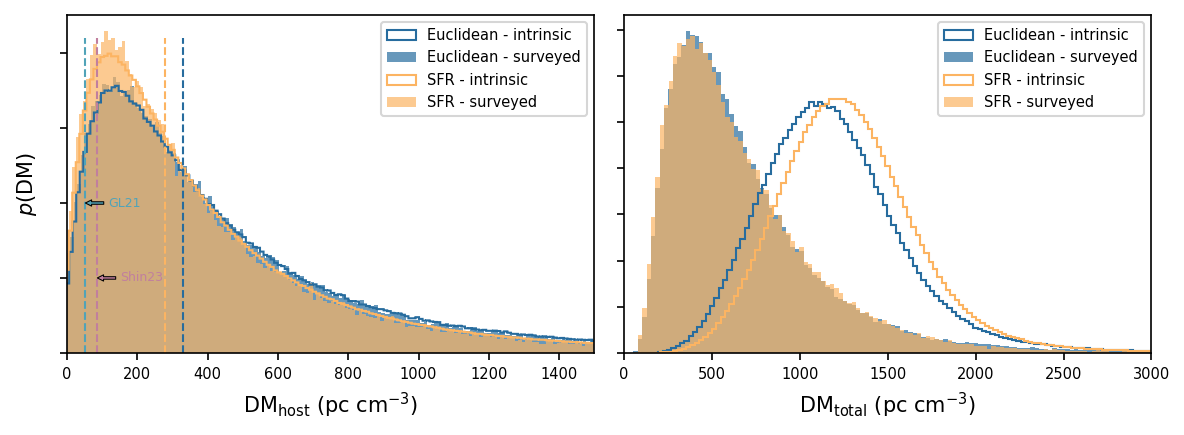

In [7]:
fig = plt.figure(figsize=(8,3), dpi=150)

ax1 = plt.subplot2grid((1,2),(0,0), rowspan=1)
ax1.hist((pop1.frbs.dm_host*(1+pop1.frbs.z))[pop1.frbs.dm<4000]-40, histtype='step', density=True, \
         bins=int(max((pop1.frbs.dm_host*(1+pop1.frbs.z))[pop1.frbs.dm<4000]-40)/10), \
         alpha=1, color='#276C9E', label='Euclidean - intrinsic')
ax1.hist((surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z))[surv_pop_pl.frbs.dm<4000]-40, density=True, \
         bins=int(max((surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z))[surv_pop_pl.frbs.dm<4000]-40)/10), \
         alpha=0.7, color='#276C9E', label='Euclidean - surveyed')
ax1.hist((pop2.frbs.dm_host*(1+pop2.frbs.z))[pop2.frbs.dm<4000]-40, histtype='step', density=True, \
         bins=int(max((pop2.frbs.dm_host*(1+pop2.frbs.z))[pop2.frbs.dm<4000]-40)/10), \
         alpha=1, color='#FCB462', label='SFR - intrinsic')
ax1.hist((surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z))[surv_pop_sfr.frbs.dm<4000]-40, density=True, \
         bins=int(max((surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z))[surv_pop_sfr.frbs.dm<4000]-40)/10), \
         alpha=0.7, color='#FCB462', label='SFR - surveyed')
ax1.set_xlabel('DM$_\mathrm{host}$ (pc cm$^{-3}$)')
ax1.set_ylabel('$p(\mathrm{DM})$', labelpad=10)
ax1.tick_params(labelsize=7, labelleft=False)
#plt.xscale('log')
ax1.set_xlim(0, 1500)
ax1.legend(fontsize=7)
ax1.vlines(np.median(surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z)-40), 0, 2.1e-3, linestyle='dashed', linewidth=1, \
           color='#276C9E')
ax1.vlines(np.median(surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z)-40), 0, 2.1e-3, linestyle='dashed', linewidth=1, \
           color='#FCB462')
ax1.vlines(50, 0, 2.1e-3, linestyle='dashed', linewidth=1, \
           color='#51A3B8')
ax1.vlines(84, 0, 2.1e-3, linestyle='dashed', linewidth=1, \
           color='#C17F9E')
#ax1.text(np.median(surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z))+10, 1.5e-3, \
#         'median: ' + str(int(np.median(surv_pop_pl.frbs.dm_host*(1+surv_pop_pl.frbs.z))-40)), color='#276C9E', usetex=True)
#ax1.text(np.median(surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z))+10, 1.8e-3, \
#         'median: ' + str(int(np.median(surv_pop_sfr.frbs.dm_host*(1+surv_pop_sfr.frbs.z))-40)), color='#F2BB6B', usetex=True)
ax1.annotate('GL21', xy=(40, 1.0e-3), xytext=(116, 1.0e-3), size=6, color='#51A3B8', ha='left', va='center', \
            arrowprops=dict(arrowstyle='simple', facecolor='#51A3B8', linewidth=0.5), \
            bbox=dict(pad=0, fc='none', ec='none'))
ax1.annotate('Shin23', xy=(74, 0.5e-3), xytext=(150, 0.5e-3), size=6, color='#C17F9E', ha='left', va='center', \
            arrowprops=dict(arrowstyle='simple', facecolor='#C17F9E', linewidth=0.5), \
            bbox=dict(pad=0, fc='none', ec='none'))

ax2 = plt.subplot2grid((1,2),(0,1), rowspan=1)#1f77b4
ax2.hist(pop1.frbs.dm[pop1.frbs.dm<4000], histtype='step', density=True, \
         bins=int(max(pop1.frbs.dm[pop1.frbs.dm<4000])/25), alpha=1, color='#276C9E', label='Euclidean - intrinsic')
ax2.hist(surv_pop_pl.frbs.dm[surv_pop_pl.frbs.dm<4000], density=True, \
         bins=int(max(surv_pop_pl.frbs.dm[surv_pop_pl.frbs.dm<4000])/25), alpha=0.7, color='#276C9E', label='Euclidean - surveyed')
ax2.hist(pop2.frbs.dm[pop2.frbs.dm<4000], histtype='step', density=True, \
         bins=int(max(pop2.frbs.dm[pop2.frbs.dm<4000])/25), alpha=1, color='#FCB462', label='SFR - intrinsic')
ax2.hist(surv_pop_sfr.frbs.dm[surv_pop_sfr.frbs.dm<4000], density=True, \
         bins=int(max(surv_pop_sfr.frbs.dm[surv_pop_sfr.frbs.dm<4000])/25), alpha=0.7, color='#FCB462', label='SFR - surveyed')

#ax2.vlines(np.median(surv_pop_pl.frbs.dm), 0, 1.4e-3, linestyle='dashed', linewidth=1, color='#276C9E')
#ax2.vlines(np.median(surv_pop_sfr.frbs.dm), 0, 1.4e-3, linestyle='dashed', linewidth=1, color='#F2BB6B')

ax2.set_xlabel('DM$_{\mathrm{total}}$ (pc cm$^{-3}$)')
ax2.tick_params(labelsize=7, labelleft=False)
ax2.set_xlim(0, 3000)
ax2.legend(fontsize=7)

plt.tight_layout()
plt.savefig('dm_distribution_before_and_after_survey.pdf', transparent=True)
plt.show()